# CUSTOMER SPENDING BEHAVIOR

## Context

The growth of supermarkets in most populated cities are increasing and market competitions are also high. The dataset is one of the historical sales of supermarket company which has recorded in 3 different branches for 3 months data.

## Attribute information
1. Invoice id: Computer generated sales slip invoice identification number.
2. Branch: Branch of supercenter (3 branches are available identified by A, B and C).
3. City: Location of supercenters.
4. Customer type: Type of customers, recorded by Members for customers using member card and Normal for without member card.
5. Gender: Gender type of customer.
6. Product line: General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel.
7. Unit price: Price of each product in $.
8. Quantity: Number of products purchased by customer.
9. Date: Date of purchase (Record available from January 2019 to March 2019).
10. Time: Purchase time (10am to 9pm).
11. Payment: Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet).
12. Gross income: Gross income.
13. Rating: Customer stratification rating on their overall shopping experience (On a scale of 1 to 10).

## LIBRARIES AND DATA IMPORT

In [1]:
# data = dataset[['Unit price', 'Quantity', 'Total', 'cogs', 'gross income', 'Rating']]
# g = sns.PairGrid(data=data, diag_sharey=False)
# g.map_upper(sns.scatterplot)
# g.map_lower(sns.scatterplot)
# g.map_diag(sns.histplot)
# g

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import root_mean_squared_error, r2_score

In [4]:
main_data = pd.read_csv('/content/drive/MyDrive/bootcamp batch9/main_data.csv')
main_data

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Date,Time,Payment,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,1/5/2019,13:08,Ewallet,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3/8/2019,10:29,Cash,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,3/3/2019,13:23,Credit card,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,1/27/2019,20:33,Ewallet,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,2/8/2019,10:37,Ewallet,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,1/29/2019,13:46,Ewallet,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,3/2/2019,17:16,Ewallet,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,2/9/2019,13:22,Cash,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,2/22/2019,15:33,Cash,3.2910,4.1


In [5]:
main_data.isnull().sum()

,0
Invoice ID,0
Branch,0
City,0
Customer type,0
Gender,0
Product line,0
Unit price,0
Quantity,0
Date,0
Time,0


In [6]:
main_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Invoice ID     1000 non-null   object 
 1   Branch         1000 non-null   object 
 2   City           1000 non-null   object 
 3   Customer type  1000 non-null   object 
 4   Gender         1000 non-null   object 
 5   Product line   1000 non-null   object 
 6   Unit price     1000 non-null   float64
 7   Quantity       1000 non-null   int64  
 8   Date           1000 non-null   object 
 9   Time           1000 non-null   object 
 10  Payment        1000 non-null   object 
 11  gross income   1000 non-null   float64
 12  Rating         1000 non-null   float64
dtypes: float64(3), int64(1), object(9)
memory usage: 101.7+ KB


In [7]:
main_data.describe()

,Unit price,Quantity,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,6.97270
std,26.494628,2.923431,11.708825,1.71858
min,10.080000,1.000000,0.508500,4.00000
25%,32.875000,3.000000,5.924875,5.50000
50%,55.230000,5.000000,12.088000,7.00000
75%,77.935000,8.000000,22.445250,8.50000
max,99.960000,10.000000,49.650000,10.00000


In [8]:
main_data = main_data.drop(columns='Invoice ID')
main_data

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Date,Time,Payment,gross income,Rating
0,A,Yangon,Member,Female,Health and beauty,74.69,7,1/5/2019,13:08,Ewallet,26.1415,9.1
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3/8/2019,10:29,Cash,3.8200,9.6
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,3/3/2019,13:23,Credit card,16.2155,7.4
3,A,Yangon,Member,Male,Health and beauty,58.22,8,1/27/2019,20:33,Ewallet,23.2880,8.4
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,2/8/2019,10:37,Ewallet,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...
995,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,1/29/2019,13:46,Ewallet,2.0175,6.2
996,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,3/2/2019,17:16,Ewallet,48.6900,4.4
997,A,Yangon,Member,Male,Food and beverages,31.84,1,2/9/2019,13:22,Cash,1.5920,7.7
998,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,2/22/2019,15:33,Cash,3.2910,4.1


## EXPLORATORY DATA ANALYSIS: SALES INSIGHT

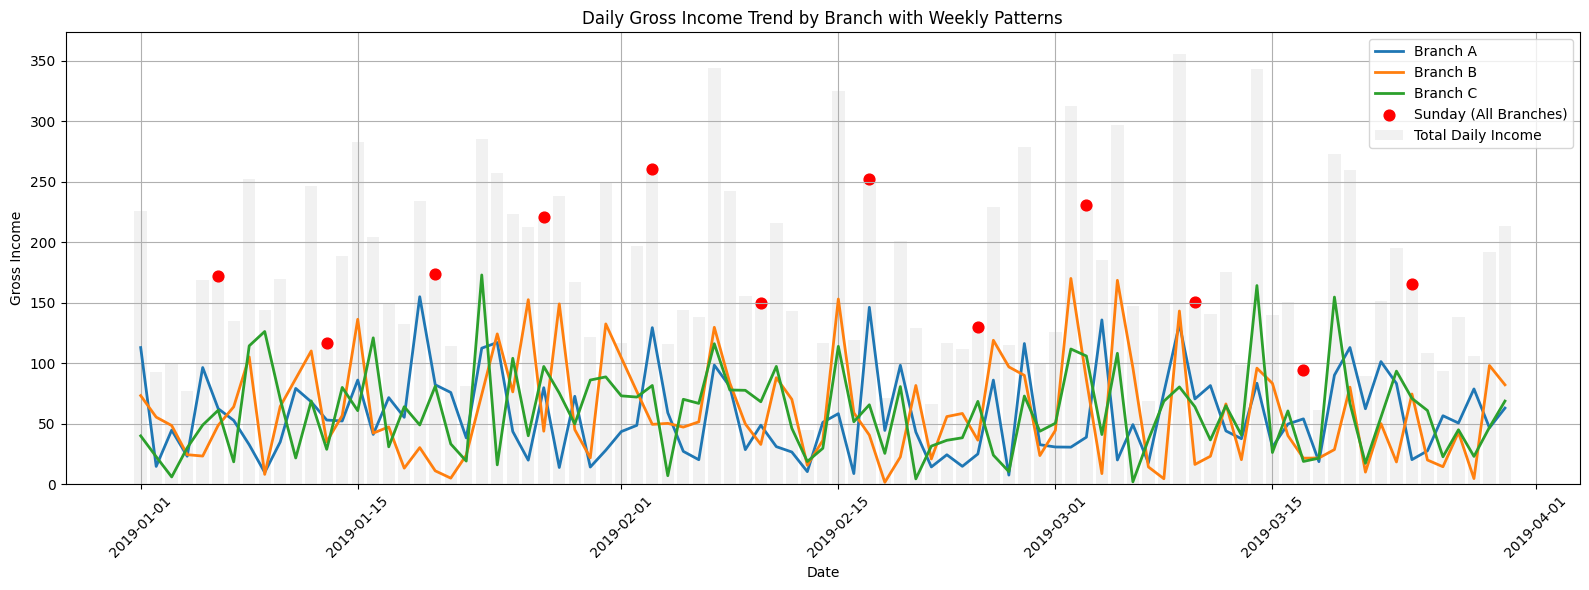

In [9]:
main_data['Date'] = pd.to_datetime(main_data['Date'])
total_daily = main_data.groupby('Date')['gross income'].sum().reset_index()
branch_daily = main_data.groupby(['Date', 'Branch'])['gross income'].sum().reset_index()
sundays = total_daily[total_daily['Date'].dt.weekday == 6]

plt.figure(figsize=(16, 6))
plt.bar(total_daily['Date'], total_daily['gross income'],
        color='lightgray', alpha=0.3, label='Total Daily Income')
for branch in branch_daily['Branch'].unique():
    data = branch_daily[branch_daily['Branch'] == branch]
    plt.plot(data['Date'], data['gross income'], label=f'Branch {branch}', linewidth=2)
plt.scatter(sundays['Date'], sundays['gross income'],
            color='red', s=60, marker='o', label='Sunday (All Branches)')
plt.xlabel('Date')
plt.ylabel('Gross Income')
plt.title('Daily Gross Income Trend by Branch with Weekly Patterns')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

REMARKS: The chart reveals a weekly pattern in gross income, with fluctuations suggesting customer behavior cycles tied to specific days. Each branch shows unique daily trends, indicating the need for localized strategies rather than uniform planning. While total income tends to peak on certain weekdays, Sunday performance varies and may offer room for targeted improvements. Branch performance peaks are not always synchronized, implying that multiple branches contribute differently to daily totals. Stakeholders should consider customizing promotions, staffing, and inventory based on branch-specific and day-specific trends.

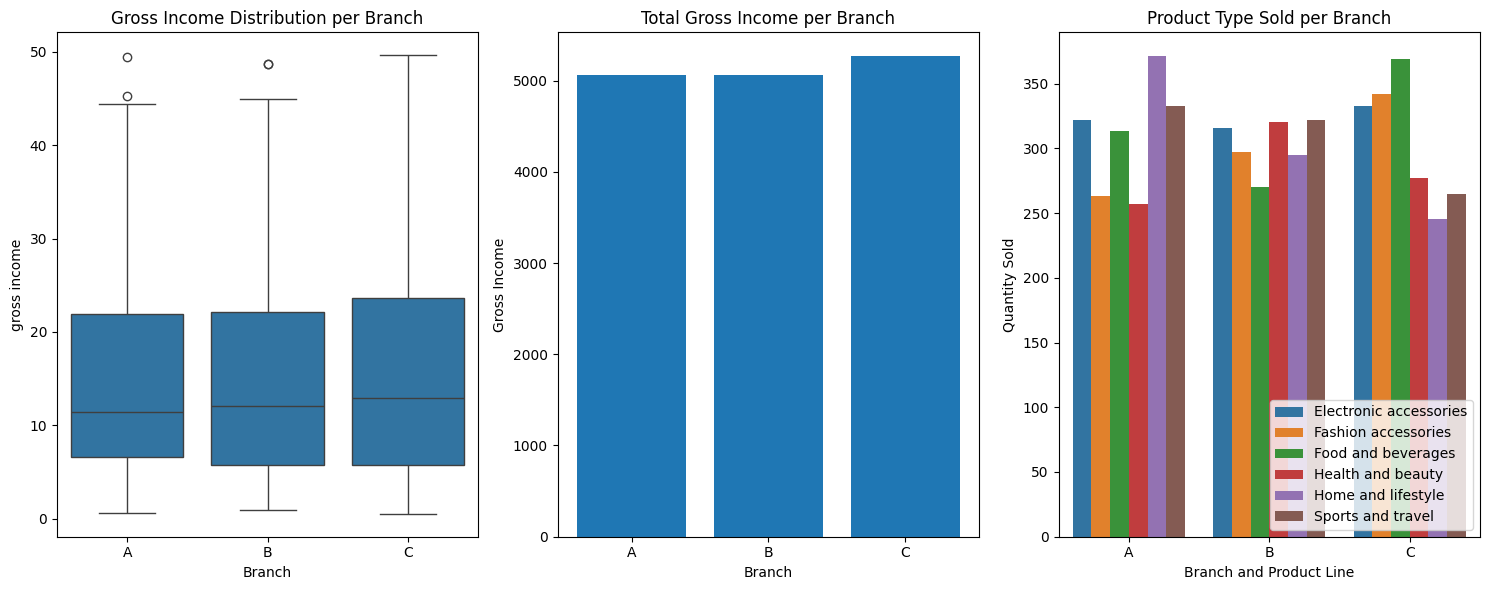

In [10]:
plt.figure(figsize=(15,6))

plt.subplot(131)
sns.boxplot(x=main_data['Branch'], y=main_data['gross income'],order=['A', 'B', 'C'])
plt.title('Gross Income Distribution per Branch')

plt.subplot(132)
branch_gross_income = main_data.groupby('Branch')['gross income'].sum()
plt.bar(x=branch_gross_income.index, height=branch_gross_income.values)
plt.title('Total Gross Income per Branch')
plt.xlabel('Branch')
plt.ylabel('Gross Income')

plt.subplot(133)
total_sold = main_data.groupby(['Branch','Product line'])['Quantity'].sum()
sns.barplot(x=total_sold.index.get_level_values('Branch'),
            y=total_sold.values,
            hue=total_sold.index.get_level_values('Product line'),
            order=['A', 'B', 'C'])
plt.legend().set_loc('lower right')
plt.title('Product Type Sold per Branch')
plt.xlabel('Branch and Product Line')
plt.ylabel('Quantity Sold')

plt.tight_layout()
plt.show()

REMARKS: As we can see from above graphs Gross Income distribution accross all branch almost the same but branch C yield higher gross margin. We can also observed that people go to branch A looking much more on Home and Lifestyle + Sports and Travel items. While people go to branch B looking for Sports and Travel,and Health and Beauty. Finally people go to branch C looking for Food and Beverages, and Fashion accessories. Electronic accessories always remain in top three accross all branches.

We could promote complementary or medium-performing products to increase total revenue per transaction. So, use popular products as anchors to drive volume and attract customers, while preserving margins on best-sellers. For example, in Branch A we could offer a combo promo buy Home and Lifestyle + 1 Fashion Accessory = 10% off total, and so on.

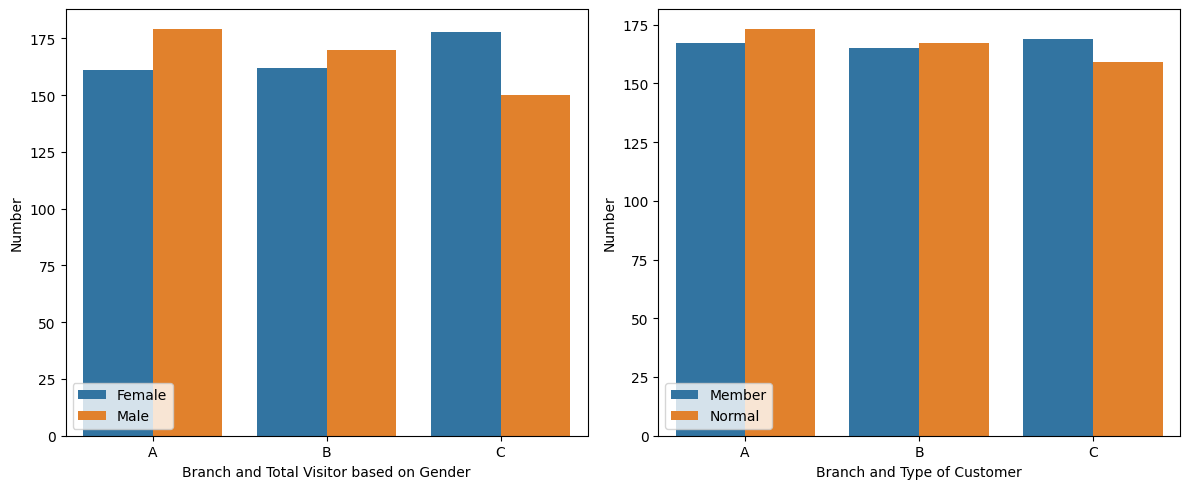

In [11]:
plt.figure(figsize=(12,5))

plt.subplot(121)
total_cust = main_data.groupby(['Branch','Gender'])['Gender'].count()
sns.barplot(x=total_cust.index.get_level_values('Branch'),
            y=total_cust.values,
            hue=total_cust.index.get_level_values('Gender'),
            order=['A', 'B', 'C'])
plt.legend().set_loc('lower left')
plt.xlabel('Branch and Total Visitor based on Gender')
plt.ylabel('Number')

plt.subplot(122)
total_cust = main_data.groupby(['Branch','Customer type'])['Customer type'].count()
sns.barplot(x=total_cust.index.get_level_values('Branch'),
            y=total_cust.values,
            hue=total_cust.index.get_level_values('Customer type'),
            order=['A', 'B', 'C'])
plt.legend().set_loc('lower left')
plt.xlabel('Branch and Type of Customer')
plt.ylabel('Number')

plt.tight_layout()
plt.show()

REMARKS: From the barplot above we can see that the number of visitor in branch A is mostly male, although further studies are needed, this might be correlated to type of product that is mostly sold in branch A and that is Home and Lifestyle + Sports and Travel items. In branch B, we can see the number of male and female visitor are almost the same and might explain why the number of items sold in branch B are roughly equal. Finally, in branch C we observed significant female visitor and this might explain why the Fashion Accessory is among top 3 items that people mostly bought in this branch.

If we see the Type of Customer barplot we can see the number of member and normal visitors are roughly the same.

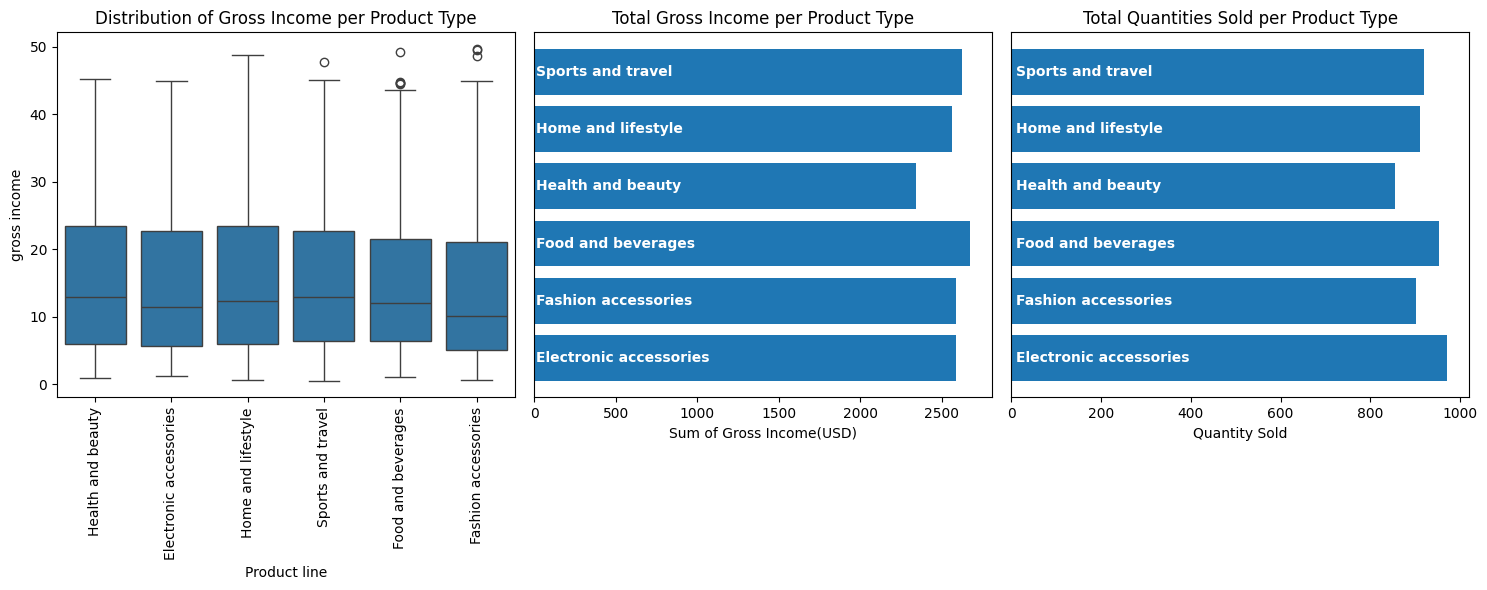

In [12]:
# PLOT TO SEE PRODUCT LINE VS GROSS INCOME, QUANTITIES SOLD, TYPE OF PAYMENT
plt.figure(figsize=(15,6))

plt.subplot(131)
sns.boxplot(x=main_data['Product line'], y=main_data['gross income'])
plt.xticks(rotation=90)
plt.title('Distribution of Gross Income per Product Type')

plt.subplot(132)
product_gross_income = main_data.groupby('Product line')['gross income'].sum()
bars = plt.barh(y=product_gross_income.index, width=product_gross_income.values)
plt.yticks([])
for bar, label in zip(bars, product_gross_income.index):
    width = bar.get_width()
    y = bar.get_y() + bar.get_height() / 2
    plt.text(x=10, y=y, s=label, va='center', ha='left', color='white', fontsize=10, weight='bold')
plt.xlabel('Sum of Gross Income(USD)')
plt.title('Total Gross Income per Product Type')

plt.subplot(133)
total_sold = main_data.groupby('Product line')['Quantity'].sum()
bars = plt.barh(y=total_sold.index, width=total_sold.values)
plt.yticks([])
for bar, label in zip(bars, total_sold.index):
    width = bar.get_width()
    y = bar.get_y() + bar.get_height() / 2
    plt.text(x=10, y=y, s=label, va='center', ha='left', color='white', fontsize=10, weight='bold')
plt.xlabel('Quantity Sold')
plt.title('Total Quantities Sold per Product Type')

plt.tight_layout()
plt.show()

REMARKS: The most profitable and popular categories are Electronic Accessories, Food and Beverages, and Fashion Accessories, driven by both high sales volume and gross income. Home and Lifestyle and Sports and Travel generate strong revenue despite selling fewer units, indicating higher per-unit margins and potential for premium targeting. Meanwhile, Health and Beauty shows inconsistent profit per transaction, suggesting the need for more pricing or promotional control. Stakeholders can leverage this by focusing volume-driven strategies for high sellers while exploring margin-based strategies for premium segments. These insights help tailor promotions, pricing, and inventory planning to optimize both revenue and profitability.

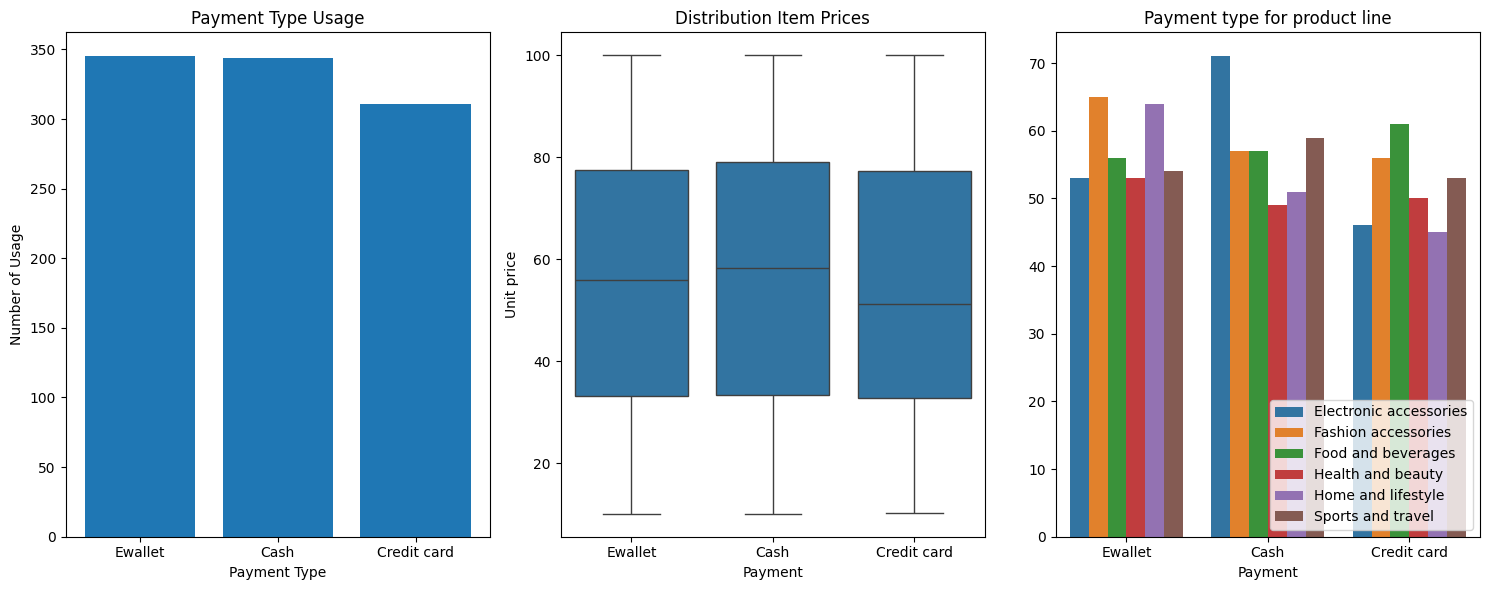

In [13]:
plt.figure(figsize=(15,6))
plt.subplot(131)
payment_type = main_data['Payment'].value_counts()
plt.bar(x=payment_type.index, height=payment_type.values)
plt.title('Payment Type Usage')
plt.xlabel('Payment Type')
plt.ylabel('Number of Usage')

plt.subplot(132)
sns.boxplot(x=main_data['Payment'], y=main_data['Unit price'])
plt.title('Distribution Item Prices')

plt.subplot(133)
payment_product = main_data.groupby(['Payment','Product line'])['Product line'].count()
sns.barplot(x=payment_product.index.get_level_values('Payment'),
            y=payment_product.values,
            hue=payment_product.index.get_level_values('Product line'),
            order=['Ewallet', 'Cash', 'Credit card'])
plt.legend().set_loc('lower right')
plt.title('Payment type for product line')

plt.tight_layout()
plt.show()

REMARKS: We can observed that payment by cash and e-wallet are much more preferred compare to Credit Card. And from the boxplot distribution, all 3 types of method payments are still prefered for the transactions, there are no signs that one method is being prefered than the others to pay expensive or cheap product. But if we specifically observe the product type, we can see that: e-wallet is much more preferred for Fashion + Home and Lifestyle products, cash payment is much more preferred for Electronic, and finally credit card is much more preferred for food and beverages transaction.

This means that stakeholders can work together with e-wallet or credit card provider creating interesting incentives when doing transaction for related products.

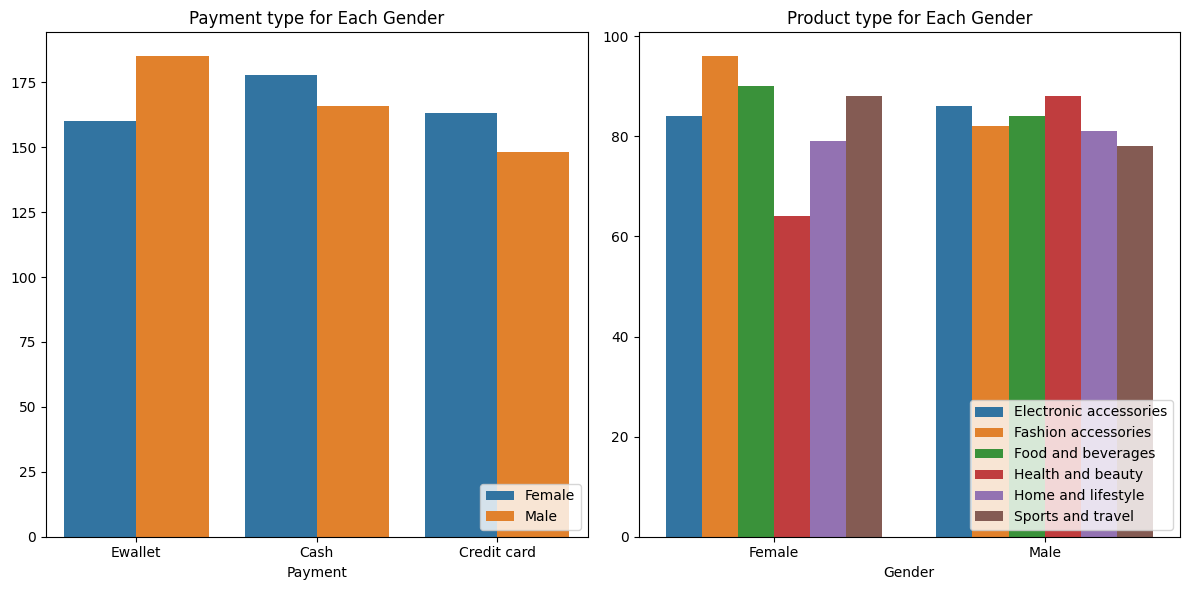

In [14]:
plt.figure(figsize=(12,6))

plt.subplot(121)
payment_type_gender = main_data.groupby(['Payment','Gender'])['Gender'].count()
sns.barplot(x=payment_type_gender.index.get_level_values('Payment'),
            y=payment_type_gender.values,
            hue=payment_type_gender.index.get_level_values('Gender'),
            order=['Ewallet', 'Cash', 'Credit card'])
plt.legend().set_loc('lower right')
plt.title('Payment type for Each Gender')

plt.subplot(122)
payment_type_gender = main_data.groupby(['Product line','Gender'])['Gender'].count()
sns.barplot(x=payment_type_gender.index.get_level_values('Gender'),
            y=payment_type_gender.values,
            hue=payment_type_gender.index.get_level_values('Product line'))
plt.legend().set_loc('lower right')
plt.title('Product type for Each Gender')
plt.tight_layout()
plt.show()

REMARKS: We can observe that Male customer much more prefer transaction by e-wallet while female customer much more prefer transaction with Cash. If we focus on product type we can notice that Male customer have tendencies to buy Health and Beauty + Electronic product while Female customer more prone to Fashion Accessories.
Same with the e-wallet or credit card strategies previously, company could work together with provider to employ incentive strategy, but for cash transaction companies could provide incentives like voucher or special day with special discount using cash.

## EXPLORATORY DATA ANALYSIS: FEATURES INTERACTION AND PREPROCESSING

In this section we will see the features interaction with the help of correlation heatmap plot. From that heatmap we will decide which features that strongly correlate in predicting target feature (which is Gross Income) in Machine Modelling later. But before we can do the correlation check we must transform/encode all categorical features to numerical or boolean.

In [15]:
print(main_data['Branch'].unique())
print(main_data['City'].unique())
print(main_data['Customer type'].unique())
print(main_data['Gender'].unique())
print(main_data['Product line'].unique())
print(main_data['Payment'].unique())

['A' 'C' 'B']
['Yangon' 'Naypyitaw' 'Mandalay']
['Member' 'Normal']
['Female' 'Male']
['Health and beauty' 'Electronic accessories' 'Home and lifestyle'
 'Sports and travel' 'Food and beverages' 'Fashion accessories']
['Ewallet' 'Cash' 'Credit card']


In [16]:
main_data = main_data.drop(columns='City')

le = LabelEncoder()
main_data['Customer type'] = le.fit_transform(main_data['Customer type'])
main_data['Gender'] = le.fit_transform(main_data['Gender'])
main_data['Branch'] = le.fit_transform(main_data['Branch'])

main_data = pd.get_dummies(main_data, columns=['Branch', 'Product line', 'Payment'])
main_data

,Customer type,Gender,Unit price,Quantity,Date,Time,gross income,Rating,Branch_0,Branch_1,Branch_2,Product line_Electronic accessories,Product line_Fashion accessories,Product line_Food and beverages,Product line_Health and beauty,Product line_Home and lifestyle,Product line_Sports and travel,Payment_Cash,Payment_Credit card,Payment_Ewallet
0,0,0,74.69,7,2019-01-05,13:08,26.1415,9.1,True,False,False,False,False,False,True,False,False,False,False,True
1,1,0,15.28,5,2019-03-08,10:29,3.8200,9.6,False,False,True,True,False,False,False,False,False,True,False,False
2,1,1,46.33,7,2019-03-03,13:23,16.2155,7.4,True,False,False,False,False,False,False,True,False,False,True,False
3,0,1,58.22,8,2019-01-27,20:33,23.2880,8.4,True,False,False,False,False,False,True,False,False,False,False,True
4,1,1,86.31,7,2019-02-08,10:37,30.2085,5.3,True,False,False,False,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,1,40.35,1,2019-01-29,13:46,2.0175,6.2,False,False,True,False,False,False,True,False,False,False,False,True
996,1,0,97.38,10,2019-03-02,17:16,48.6900,4.4,False,True,False,False,False,False,False,True,False,False,False,True
997,0,1,31.84,1,2019-02-09,13:22,1.5920,7.7,True,False,False,False,False,True,False,False,False,True,False,False
998,1,1,65.82,1,2019-02-22,15:33,3.2910,4.1,True,False,False,False,False,False,False,True,False,True,False,False


In [17]:
main_data['Date'] = pd.to_datetime(main_data['Date'])

main_data['day'] = main_data['Date'].dt.day
main_data['month'] = main_data['Date'].dt.month
main_data['year'] = main_data['Date'].dt.year

main_data['hour'] = pd.to_datetime(main_data['Time'], format='%H:%M').dt.hour
main_data.rename(columns={'hour': 'hour_bin'}, inplace=True)
main_data

,Customer type,Gender,Unit price,Quantity,Date,Time,gross income,Rating,Branch_0,Branch_1,...,Product line_Health and beauty,Product line_Home and lifestyle,Product line_Sports and travel,Payment_Cash,Payment_Credit card,Payment_Ewallet,day,month,year,hour_bin
0,0,0,74.69,7,2019-01-05,13:08,26.1415,9.1,True,False,...,True,False,False,False,False,True,5,1,2019,13
1,1,0,15.28,5,2019-03-08,10:29,3.8200,9.6,False,False,...,False,False,False,True,False,False,8,3,2019,10
2,1,1,46.33,7,2019-03-03,13:23,16.2155,7.4,True,False,...,False,True,False,False,True,False,3,3,2019,13
3,0,1,58.22,8,2019-01-27,20:33,23.2880,8.4,True,False,...,True,False,False,False,False,True,27,1,2019,20
4,1,1,86.31,7,2019-02-08,10:37,30.2085,5.3,True,False,...,False,False,True,False,False,True,8,2,2019,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,1,40.35,1,2019-01-29,13:46,2.0175,6.2,False,False,...,True,False,False,False,False,True,29,1,2019,13
996,1,0,97.38,10,2019-03-02,17:16,48.6900,4.4,False,True,...,False,True,False,False,False,True,2,3,2019,17
997,0,1,31.84,1,2019-02-09,13:22,1.5920,7.7,True,False,...,False,False,False,True,False,False,9,2,2019,13
998,1,1,65.82,1,2019-02-22,15:33,3.2910,4.1,True,False,...,False,True,False,True,False,False,22,2,2019,15


In [18]:
main_data = main_data.drop(columns=['Date', 'Time'])
main_data

,Customer type,Gender,Unit price,Quantity,gross income,Rating,Branch_0,Branch_1,Branch_2,Product line_Electronic accessories,...,Product line_Health and beauty,Product line_Home and lifestyle,Product line_Sports and travel,Payment_Cash,Payment_Credit card,Payment_Ewallet,day,month,year,hour_bin
0,0,0,74.69,7,26.1415,9.1,True,False,False,False,...,True,False,False,False,False,True,5,1,2019,13
1,1,0,15.28,5,3.8200,9.6,False,False,True,True,...,False,False,False,True,False,False,8,3,2019,10
2,1,1,46.33,7,16.2155,7.4,True,False,False,False,...,False,True,False,False,True,False,3,3,2019,13
3,0,1,58.22,8,23.2880,8.4,True,False,False,False,...,True,False,False,False,False,True,27,1,2019,20
4,1,1,86.31,7,30.2085,5.3,True,False,False,False,...,False,False,True,False,False,True,8,2,2019,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,1,40.35,1,2.0175,6.2,False,False,True,False,...,True,False,False,False,False,True,29,1,2019,13
996,1,0,97.38,10,48.6900,4.4,False,True,False,False,...,False,True,False,False,False,True,2,3,2019,17
997,0,1,31.84,1,1.5920,7.7,True,False,False,False,...,False,False,False,True,False,False,9,2,2019,13
998,1,1,65.82,1,3.2910,4.1,True,False,False,False,...,False,True,False,True,False,False,22,2,2019,15


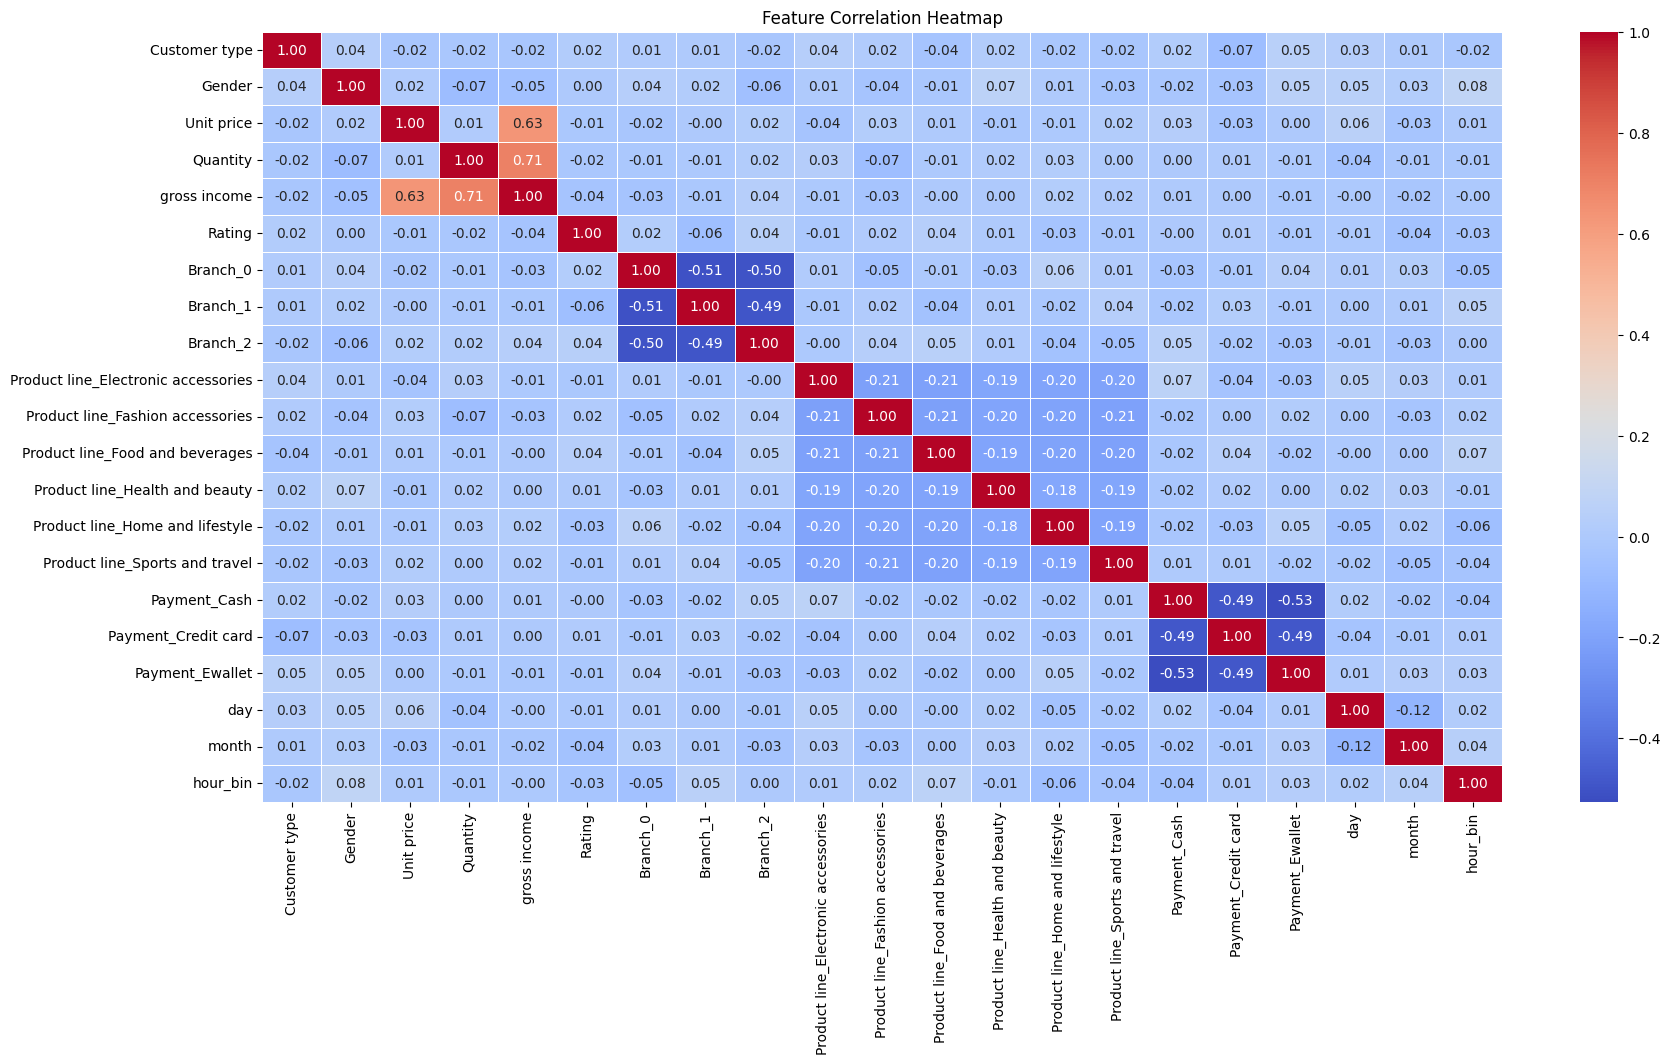

In [19]:
main_data = main_data.drop(columns='year')
corr_matrix = main_data.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(20,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

REMARKS: From the heatmap correlation above we can notice that 2 features have good correlation signal to target feature Gross Income, and therefore we will drop all features that don't give good signal to the target feature, and keep features 'Unit Price' and 'Item Quantity' for Machine Learning modeling.

## MACHINE LEARNING MODELLING FOR PREDICTION

Now, we will start modelling the Machine Learning, we choose 3 models for this step namely: `LinearRegression`,`LinearSVR` and `DecisionTreeRegressor`. Then we will measure the performance of each models using R square and Root Mean Square score and determine whih model is the best for this regression case.

In [20]:
x_main = main_data[['Unit price', 'Quantity']]
y_main = main_data['gross income']

x_train, x_test, y_train, y_test = train_test_split(x_main, y_main, test_size=0.2, random_state=42)

In [21]:
lin_model = LinearRegression()
lin_model.fit(x_train, y_train)
y_pred_lin = lin_model.predict(x_test)

r2_score_lin = r2_score(y_test, y_pred_lin)
rmse_lin = root_mean_squared_error(y_test, y_pred_lin)
print(f'Linear Regression R2 score: {r2_score_lin}')
print(f'Linear Regression RMSE score: {rmse_lin}')

Linear Regression R2 score: 0.9042708171993605
Linear Regression RMSE score: 3.75799842714608


In [24]:
svr_model = LinearSVR(max_iter = 5000, C=1.5)
svr_model.fit(x_train, y_train)
y_pred_svr = svr_model.predict(x_test)

r2_score_svr = r2_score(y_test, y_pred_svr)
rmse_svr = root_mean_squared_error(y_test, y_pred_svr)
print(f'Linear Regression R2 score: {r2_score_svr}')
print(f'Linear Regression RMSE score: {rmse_svr}')

Linear Regression R2 score: 0.9030231772238676
Linear Regression RMSE score: 3.7824081783411083


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [23]:
tree_model = DecisionTreeRegressor(max_depth=40, random_state=42)
tree_model.fit(x_train, y_train)
y_pred_tree = tree_model.predict(x_test)

r2_score_tree = r2_score(y_test, y_pred_tree)
rmse_tree = root_mean_squared_error(y_test, y_pred_tree)
print(f'Linear Regression R2 score: {r2_score_tree}')
print(f'Linear Regression RMSE score: {rmse_tree}')

Linear Regression R2 score: 0.9993242596682052
Linear Regression RMSE score: 0.3157361715103292


REMARKS: Based on the models above we can see that `DecisionTreeRegressor` performs better than the other. The model managed to predict the test data with R square score of 0.9993, almost reaching perfection (score 1.00). The RMSE score of `DecisionTreeRegressor` also the smallest among the other, that is 0.3157 and showing small error in the prediction